# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** I Nengah Danarsa Suniadevta
- **Email:** devtadanarsa@gmail.com
- **ID Dicoding:** good_guy_KBsy

## Menentukan Pertanyaan Bisnis

- How has the company's sales and revenue performed in the last few years?
- Which products sell the most and the least?¶
- Are customers satisfied with their orders?¶
- How's the spending distribution across customers?
- Where are the majority of customers and sellers located?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

## 1. Data Wrangling

### 1.1 Gathering Data

The first step to this project is gathering the data by importing all the table in the dataset and turn it into pandas DataFrame.

In [2]:
DATA_DIR = 'data/'

customers = pd.read_csv(DATA_DIR + 'customers.csv')
geolocations = pd.read_csv(DATA_DIR + 'geolocation.csv')
order_items = pd.read_csv(DATA_DIR + 'order_items.csv')
order_payments = pd.read_csv(DATA_DIR + 'order_payments.csv')
order_reviews = pd.read_csv(DATA_DIR + 'order_reviews.csv')
orders = pd.read_csv(DATA_DIR + 'orders.csv')
products = pd.read_csv(DATA_DIR + 'products.csv')
sellers = pd.read_csv(DATA_DIR + 'sellers.csv')
category_translation = pd.read_csv(DATA_DIR + 'category_translation.csv')

I create a dictionary that contains all the DataFrame because it will be easier for me.

In [3]:
data = {
    'customers': customers,
    'geolocations': geolocations,
    'order_items': order_items,
    'order_payments': order_payments,
    'order_reviews': order_reviews,
    'orders': orders,
    'products': products,
    'sellers': sellers,
    'category_translation': category_translation
}

Now, it's time to check all the data, is it succesfully imported?

In [4]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
data['geolocations'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
data['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
data['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
data['order_reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
data['category_translation'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 1.2 Assessing Data

After importing all the data, I continue to see the information of these DataFrame. By using info() method, I can see total rows, field, and the data type.

In [13]:
for key, df in data.items():
    print("DataFrame: {}".format(key))
    print(df.info())
    print("\n" + "="*50 + "\n")

DataFrame: customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


DataFrame: geolocations
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64


Next step, I want to see the total sample and check if there is a duplicate in each DataFrame using this code. With this code, I can easily read the total sample and the duplicate count.

In [14]:
duplicate_counts = []
total_samples = []

for df in data.values():
    duplicate_counts.append(df.duplicated().sum())
    total_samples.append(len(df))

pd.DataFrame({
    'DataFrame': data.keys(),
    'Total Sample': total_samples,
    'Duplicate Count': duplicate_counts
})

,DataFrame,Total Sample,Duplicate Count
0,customers,99441,0
1,geolocations,1000163,261831
2,order_items,112650,0
3,order_payments,103886,0
4,order_reviews,99224,0
5,orders,99441,0
6,products,32951,0
7,sellers,3095,0
8,category_translation,71,0


The next step, I need to see if there is a null values in each DataFrame.

In [15]:
null_summary = []

for key, df in data.items():
    nulls_per_column = df.isnull().sum()
    for column, null_count in nulls_per_column.items():
        if null_count > 0:
            null_summary.append({
                'DataFrame': key,
                'Column': column,
                'Null Count': null_count
            })

pd.DataFrame(null_summary)

,DataFrame,Column,Null Count
0,order_reviews,review_comment_title,87656
1,order_reviews,review_comment_message,58247
2,orders,order_approved_at,160
3,orders,order_delivered_carrier_date,1783
4,orders,order_delivered_customer_date,2965
5,products,product_category_name,610
6,products,product_name_lenght,610
7,products,product_description_lenght,610
8,products,product_photos_qty,610
9,products,product_weight_g,2


### 1.3 Data Cleaning

I start the cleaning process by removing the duplicate rows in geolocations DataFrame.

In [16]:
data['geolocations'].duplicated().sum()

261831

In [17]:
data['geolocations'].drop_duplicates(inplace=True)
data['geolocations'].duplicated().sum()

0

I'll remove review_comment_title and review_comment_message in Order Reviews DataFrame because I'll not use it in my analysis. These two columns also have many null values, so it won't be valuable

In [18]:
data['order_reviews'].drop('review_comment_title', axis=1, inplace=True)
data['order_reviews'].drop('review_comment_message', axis=1, inplace=True)

data['order_reviews'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Products DataFrame has so many columns with NULL values. Firstly, I will do some simple things, which is:
- Remove product_name_length &rarr; Many null values and don't think this is valuable.
- Remove product_description_length &rarr; Many null values and don't think this is valuable.
- Remove product_photos_qty &rarr; Many null values and don't think this is valuable.

In [19]:
drop_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
data['products'].drop(drop_cols, axis=1, inplace=True)

data['products'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


But, there is four more column with null values in the Products DataFrame, which is product_weight_g, product_length_cm, product_height_cm, dan product_with_cm. I don't think this measurement will be useful for my analysis, so I just remove it.

In [20]:
drop_cols = ['product_length_cm', 'product_weight_g', 'product_height_cm', 'product_width_cm']
data['products'].drop(drop_cols, axis=1, inplace=True)

data['products'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


As you can see in the information above, there is 610 product category name that have NULL values. For this case, because the NULL value is only 1.8% of the data, I'll just drop the NULL rows.

In [21]:
data['products'].dropna(inplace=True)
data['products'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32341 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 758.0+ KB


For the analysis, I just keep order data that have been delivered. I do this because the uncompleted orders maybe have null values in order_delivered_carrier_date and order_delivered_customer_date. Uncompleted orders also will not included in reviews DataFrame. So I'm afraid that this will affect the analysis

In [22]:
data['orders']['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [23]:
data['orders'] = data['orders'][data['orders']['order_status'] == 'delivered']
data['orders']['order_status'].value_counts()

order_status
delivered    96478
Name: count, dtype: int64

In [24]:
data['orders'] = data['orders'].dropna()
data['orders'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


After dropping rows that I don't use, I will drop columns that will not be used such as order_status, order_approved_at, order_delivered_carrier_date, order_estimated_delivery_data

In [25]:
cols = ['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
data['orders'].drop(cols, axis=1, inplace=True)

data['orders'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_purchase_timestamp       96455 non-null  object
 3   order_delivered_customer_date  96455 non-null  object
dtypes: object(4)
memory usage: 3.7+ MB


To finish the cleaning process, I change the date field format in orders DataFrame to datetime. I do this because it will help to process data that associated with date.

In [26]:
datetime_cols = ['order_delivered_customer_date', 'order_purchase_timestamp']

for col in datetime_cols:
    data['orders'][col] = pd.to_datetime(data['orders'][col])

data['orders'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_purchase_timestamp       96455 non-null  datetime64[ns]
 3   order_delivered_customer_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 3.7+ MB


## 2. Exploratory Data Analysis (EDA)

### 2.1 Explore Orders DataFrame

orders DataFrame contains a value about every orders that happens in this E-Commerce. This DataFrame contains information about order_purchase_timestamp and order_delivered_customer_date which can I use to count the delivery time. To do that, I need to change the data type from string to Datetime.

In [27]:
delivery_time = data['orders']['order_delivered_customer_date'] - data['orders']['order_purchase_timestamp']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
data['orders']['delivery_time'] = round(delivery_time/86400)

Then, we have one new column named delivery_time which is the day differents between order_purchase_timestamp and order_delivered_customer_date as follows.

In [28]:
data['orders'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_purchase_timestamp       96455 non-null  datetime64[ns]
 3   order_delivered_customer_date  96455 non-null  datetime64[ns]
 4   delivery_time                  96455 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 4.4+ MB


To get a statics parameters summary of the newly made column in Orders DataFrame, I use the describe() method as follows.

In [29]:
data['orders']['delivery_time'].describe(include='all')

count    96455.000000
mean        12.516510
std          9.549972
min          1.000000
25%          7.000000
50%         10.000000
75%         16.000000
max        210.000000
Name: delivery_time, dtype: float64

### 2.2 Explore Customers DataFrame

First, I want to get all the statistics parameters of this DataFrame.

In [30]:
data['customers'].describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


5 states that have the most customers. Ranked descendingly from the highest first.

In [31]:
data['customers'].groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).head(5)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_id, dtype: int64

5 cities that have the most customers. Ranked descendingly from the highest first.

In [32]:
data['customers'].groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False).head(5)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_id, dtype: int64

### 2.2 Explore Orders and Customers DataFrame

Merge the orders DataFrame and customers DataFrame because they have a same field which is customer_id.

In [33]:
orders_customers = pd.merge(
    left = data['orders'],
    right = data['customers'],
    how = 'left',
    left_on = 'customer_id',
    right_on = 'customer_id'
)

Get the statitics parameters of each field.

In [34]:
orders_customers.describe(include='all')

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,96455,96455,96455,96455,96455.000000,96455,96455.000000,96455,96455
unique,96455,96455,NaN,NaN,NaN,93336,NaN,4085,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,NaN,NaN,NaN,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,NaN,NaN,NaN,15,NaN,15043,40488
mean,NaN,NaN,2018-01-02 00:26:23.673806336,2018-01-14 13:49:28.328526336,12.516510,NaN,35199.156674,NaN,NaN
min,NaN,NaN,2016-09-15 12:16:38,2016-10-11 13:46:32,1.000000,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,2017-09-14 09:39:02.500000,2017-09-25 22:56:47,7.000000,NaN,11355.000000,NaN,NaN
50%,NaN,NaN,2018-01-20 20:00:12,2018-02-02 19:52:30,10.000000,NaN,24436.000000,NaN,NaN
75%,NaN,NaN,2018-05-05 18:53:33,2018-05-15 23:09:15.500000,16.000000,NaN,59056.000000,NaN,NaN
max,NaN,NaN,2018-08-29 15:00:37,2018-10-17 13:22:46,210.000000,NaN,99980.000000,NaN,NaN


Check top 5 states where most customers come from. Ranked descendingly from the highest.

In [35]:
orders_customers.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False).head(5)

customer_state
SP    40488
RJ    12348
MG    11351
RS     5342
PR     4923
Name: order_id, dtype: int64

Check top 5 cities where most customers come from. Ranked descendingly from the highest.

In [36]:
orders_customers.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).head(5)

customer_city
sao paulo         15043
rio de janeiro     6600
belo horizonte     2697
brasilia           2071
curitiba           1489
Name: order_id, dtype: int64

### 2.3 Explore Sellers

In [37]:
data['sellers'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Explore how much sellers from each state.

In [38]:
data['sellers'].groupby(by='seller_state').seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

Explore how much sellers from each cities

In [39]:
data['sellers'].groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

### 2.4 Explore Products

Firstly, I want to translate the product category name from the Brazilian languange (maybe Spanish) to English. To do this, I use the category_translation DataFrame

In [40]:
translate_dict = dict(zip(data['category_translation']['product_category_name'], data['category_translation']['product_category_name_english']))

def translate_category_name(name):
    if name in translate_dict.keys():
        return translate_dict[name]
    return name

In [41]:
data['products']['product_category_name'] = data['products']['product_category_name'].apply(translate_category_name)
data['products'].head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


Exploring each product category quantity.

In [42]:
data['products'].groupby(by='product_category_name').product_id.nunique().sort_values(ascending=False)

product_category_name
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
home_comfort_2                  5
fashion_childrens_clothes       5
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 73, dtype: int64

### 2.5 Explore Data Order Items

Merge order_items and products because they have mutual key which is order_id.

In [43]:
orders_products = pd.merge(
    left=data['order_items'],
    right=data['products'],
    how='left',
    left_on='product_id',
    right_on='product_id'
)

orders_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               112650 non-null  object 
 1   order_item_id          112650 non-null  int64  
 2   product_id             112650 non-null  object 
 3   seller_id              112650 non-null  object 
 4   shipping_limit_date    112650 non-null  object 
 5   price                  112650 non-null  float64
 6   freight_value          112650 non-null  float64
 7   product_category_name  111047 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.9+ MB


Merge order_items and sellers because they have mutual key which is seller_id.

In [44]:
order_items_all = pd.merge(
    left=orders_products,
    right=data['sellers'],
    how='left',
    left_on='seller_id',
    right_on='seller_id',
)

order_items_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                112650 non-null  object 
 1   order_item_id           112650 non-null  int64  
 2   product_id              112650 non-null  object 
 3   seller_id               112650 non-null  object 
 4   shipping_limit_date     112650 non-null  object 
 5   price                   112650 non-null  float64
 6   freight_value           112650 non-null  float64
 7   product_category_name   111047 non-null  object 
 8   seller_zip_code_prefix  112650 non-null  int64  
 9   seller_city             112650 non-null  object 
 10  seller_state            112650 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.5+ MB


Check the statistics parameters of the merged DataFrame.

In [45]:
order_items_all.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,seller_zip_code_prefix,seller_city,seller_state
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,111047,112650.000000,112650,112650
unique,98666,NaN,32951,3095,93318,NaN,NaN,73,NaN,611,23
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,bed_bath_table,NaN,sao paulo,SP
freq,21,NaN,527,2033,21,NaN,NaN,11115,NaN,27983,80342
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,24439.170431,NaN,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,27596.030909,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,1001.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,6429.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000,NaN,13568.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,NaN,27930.000000,NaN,NaN


### 2.6 Explore Data Payments

Explore statistics parameters of payments DataFrame.

In [46]:
data['order_payments'].describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Explore quantity of each payment_type are used.

In [47]:
data['order_payments'].groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### 2.7 Explore Data Reviews

Exploring statistics parameters in order_reviews DataFrame

In [48]:
data['order_reviews'].describe(include='all')

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224
unique,98410,98673,NaN,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,463,4
mean,NaN,NaN,4.086421,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN


Check the value counts of each review_score.

In [49]:
data['order_reviews']['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

### 2.8 Explore Data All

Merge all DataFrame into one.

In [50]:
data_all = orders_customers.merge(
    data['order_reviews'], on='order_id', how='left'
).merge(
    data['order_payments'], on='order_id', how='left'
).merge(
    order_items_all, on='order_id', how='left'
)

data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115699 entries, 0 to 115698
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115699 non-null  object        
 1   customer_id                    115699 non-null  object        
 2   order_purchase_timestamp       115699 non-null  datetime64[ns]
 3   order_delivered_customer_date  115699 non-null  datetime64[ns]
 4   delivery_time                  115699 non-null  float64       
 5   customer_unique_id             115699 non-null  object        
 6   customer_zip_code_prefix       115699 non-null  int64         
 7   customer_city                  115699 non-null  object        
 8   customer_state                 115699 non-null  object        
 9   review_id                      114838 non-null  object        
 10  review_score                   114838 non-null  float64       
 11  

## 3. Data Visualization

### Question 1: How has the company's sales and revenue performed in the last few years?

In [51]:
monthly_orders = (
    data_all.resample('ME', on='order_purchase_timestamp')
    .agg(order_count=('order_id', 'nunique'), revenue=('payment_value', 'sum'))
)

monthly_orders.index = monthly_orders.index.strftime("%b %Y")

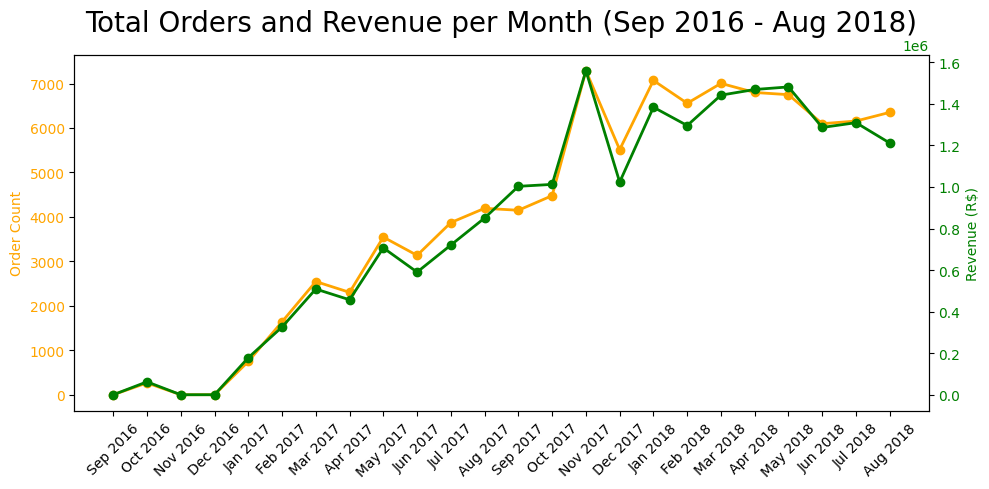

In [52]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(monthly_orders.index, monthly_orders['order_count'], marker='o', linewidth=2, color='orange', label='Order Count')
ax1.set_ylabel('Order Count', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xticks(monthly_orders.index)
ax1.set_xticklabels(monthly_orders.index, rotation=45)

ax2 = ax1.twinx()
ax2.plot(monthly_orders.index, monthly_orders['revenue'], marker='o', linewidth=2, color='green', label='Revenue')
ax2.set_ylabel('Revenue (R$)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Total Orders and Revenue per Month (Sep 2016 - Aug 2018)", fontsize=20)
fig.tight_layout()
plt.show()

**Insight**:
- Total orders and revenue per month is increasing incrementally year after year. But, there is a hard decline in December 2017.
- Orders and revenue per month have a positive correlation.

In [53]:
monthly_orders.index = pd.to_datetime(monthly_orders.index)
quartals_orders = monthly_orders.resample('QE').sum()
quartals_orders.index = quartals_orders.index.to_period('Q').strftime('Q%q %Y')

/var/folders/90/pm32c37x1tl6z_r_1b12vsn40000gn/T/ipykernel_54382/1401262590.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_orders.index = pd.to_datetime(monthly_orders.index)


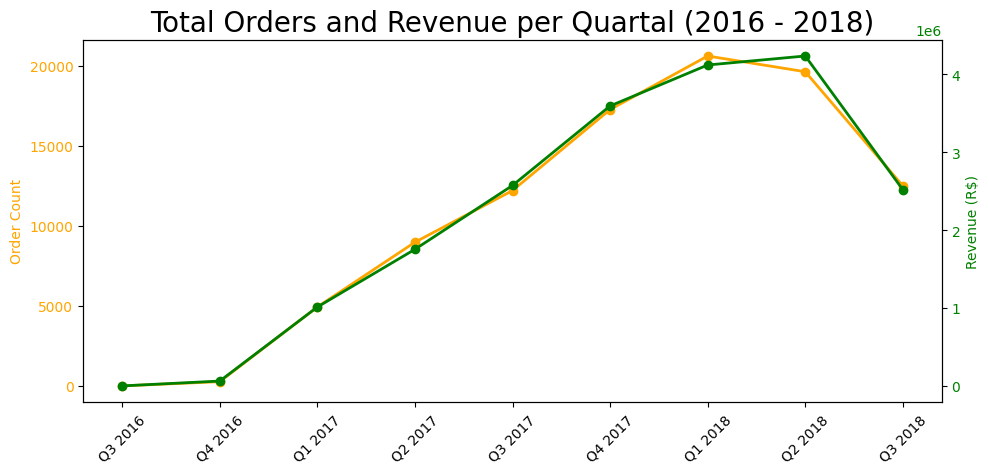

In [54]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(quartals_orders.index, quartals_orders['order_count'], marker='o', linewidth=2, color='orange', label='Order Count')
ax1.set_ylabel('Order Count', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xticks(quartals_orders.index)
ax1.set_xticklabels(quartals_orders.index, rotation=45)

# Revenue
ax2 = ax1.twinx()
ax2.plot(quartals_orders.index, quartals_orders['revenue'], marker='o', linewidth=2, color='g', label='Revenue')
ax2.set_ylabel('Revenue (R$)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title("Total Orders and Revenue per Quartal (2016 - 2018)", fontsize=20)
fig.tight_layout()
plt.show()

**Insight:**
- Total orders and revenue per month is increasing in each quarter
- The hard decline on Q3 2018 probably caused by the datasets doesn't have full value of Q3 2018 order data.

### Question 2: Which products sell the most and the least?

In [55]:
sum_product_category = pd.DataFrame(data_all.groupby(by='product_category_name').product_id.nunique().sort_values(ascending=False).reset_index()).rename(columns={'product_id': 'quantity'})

/var/folders/90/pm32c37x1tl6z_r_1b12vsn40000gn/T/ipykernel_54382/125665763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_category_name", data=sum_product_category.head(5), palette=colors, ax=ax[0])
/var/folders/90/pm32c37x1tl6z_r_1b12vsn40000gn/T/ipykernel_54382/125665763.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_category_name", data=sum_product_category.sort_values(by='quantity', ascending=True).head(5), palette=colors, ax=ax[1])


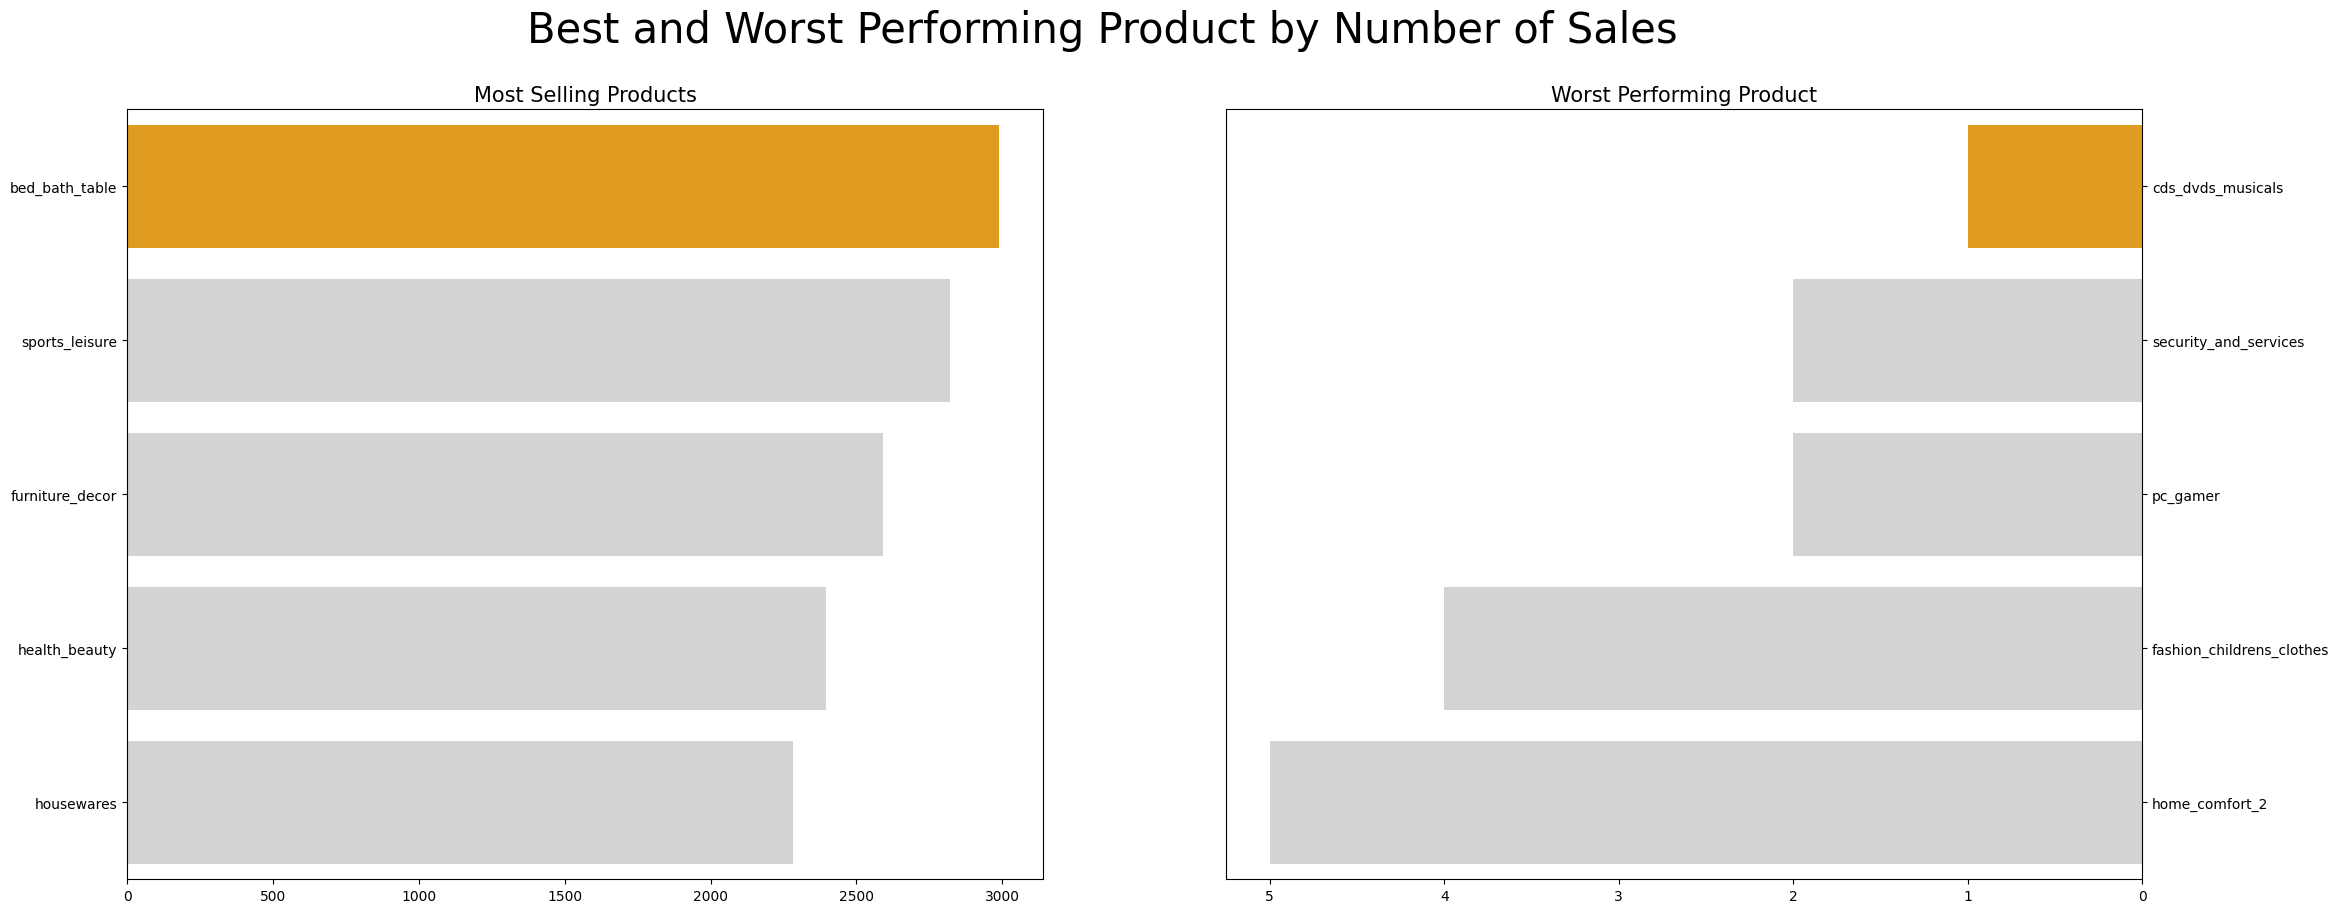

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(26,10))

colors = ["orange", "lightgray", "lightgray", "lightgray", "lightgray"]

sns.barplot(x="quantity", y="product_category_name", data=sum_product_category.head(5), palette=colors, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Most Selling Products", fontsize=15),
ax[0].tick_params(axis='y')

sns.barplot(x="quantity", y="product_category_name", data=sum_product_category.sort_values(by='quantity', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("Worst Performing Product", fontsize=15),
ax[1].yaxis.tick_right()
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=30)
plt.show()

**Insight:**
- The most sold product is bed_bath table, followed by sports_leisure.
- The least sold product is ods_dvds_musicals, followed by security_and_services

### Question 3: Are customers satisfied with their orders?

In [57]:
reviews_sum = pd.DataFrame(data_all.groupby(by='review_score').order_id.nunique().sort_values(ascending=False).reset_index()).rename(columns={'order_id': 'quantity'})
reviews_colors = ['lightgray' if qty != reviews_sum['quantity'].max() else 'orange' for qty in reviews_sum['quantity']]

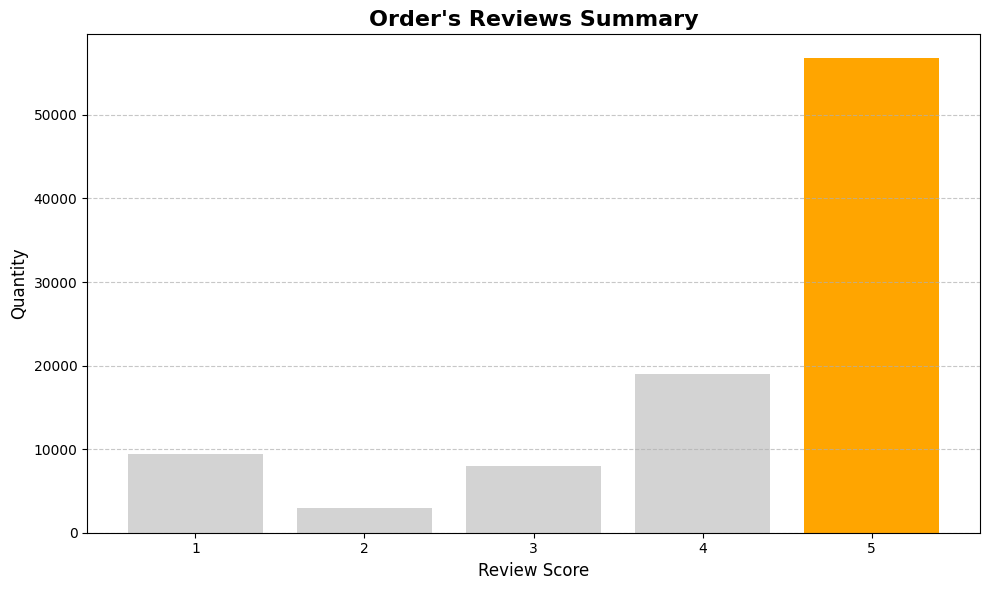

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(x=reviews_sum['review_score'], height=reviews_sum['quantity'], color=reviews_colors)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title("Order's Reviews Summary", fontsize=16, fontweight='bold')
plt.xticks(ticks=reviews_sum['review_score'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- customers are mostly satisfied because the value of 5 in review_score is really high compared to others.

### Question 4: How's the spending distribution across customers?

In [59]:
spending_distributions = data_all.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", 
    "payment_value": "sum"
})

# Filter to 95% because there is an outlier.
spending_filtered = spending_distributions[spending_distributions['payment_value'] <= spending_distributions['payment_value'].quantile(0.95)]

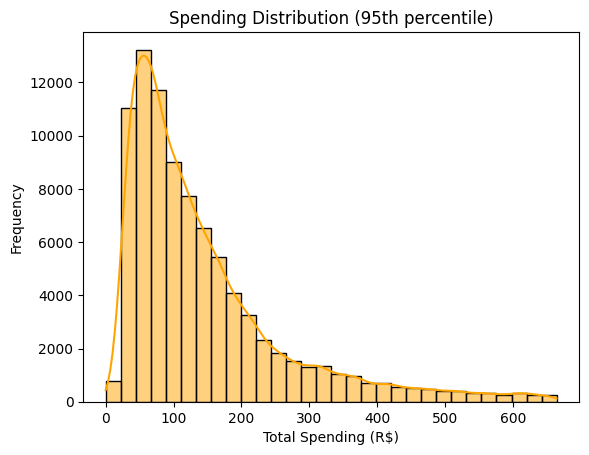

In [60]:
sns.histplot(spending_filtered['payment_value'], bins=30, kde=True, color='orange')
plt.title('Spending Distribution (95th percentile)')
plt.xlabel('Total Spending (R$)')
plt.ylabel('Frequency')

plt.show()

**Insight:**
- Customers mostly spending 40-100 R$
- From these total spending distribution, we may assume that there is few customers that repeating orders.

### Question 5: Where are the majority of customers and sellers located?

In [61]:
customer_geolocations = data['geolocations'][data['geolocations']['geolocation_zip_code_prefix'].isin(data_all['customer_zip_code_prefix'])]
seller_geolocations = data['geolocations'][data['geolocations']['geolocation_zip_code_prefix'].isin(data_all['seller_zip_code_prefix'])]

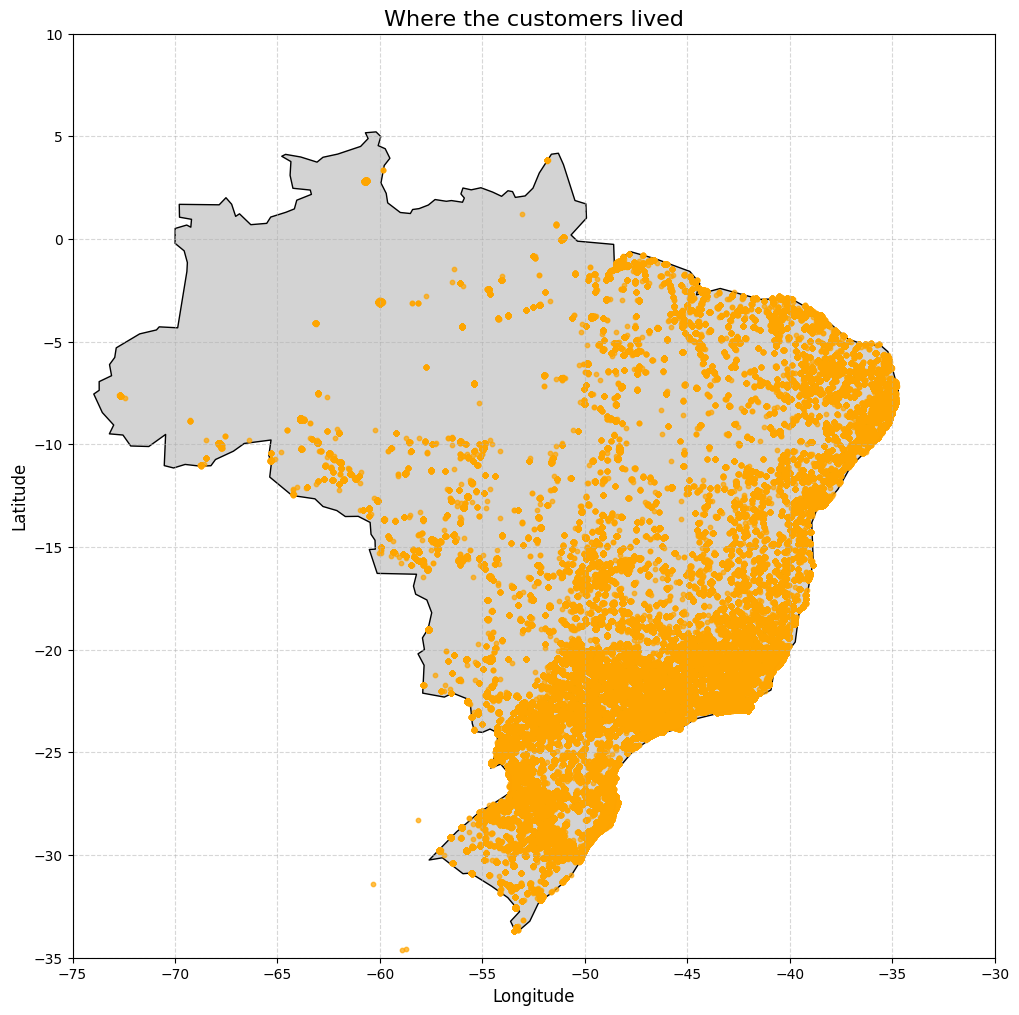

In [62]:
geometry = [Point(xy) for xy in zip(customer_geolocations['geolocation_lng'], customer_geolocations['geolocation_lat'])]
gdf = gpd.GeoDataFrame(customer_geolocations, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)

world = gpd.read_file('data/naturalearth_lowres/naturalearth_lowres.shp')
brazil = world[world.name == 'Brazil']

fig, ax = plt.subplots(figsize=(12, 12))
brazil.plot(ax=ax, color='lightgray', edgecolor='black')  # Plot Brazil map

gdf.plot(ax=ax, color='orange', alpha=0.7, markersize=10)  # Plot points on top

plt.xlim([-75, -30])
plt.ylim([-35, 10])

plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Where the customers lived', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Show plot
plt.show()

**Insight:**
- Much customers are located in the east and south of Brazil.
- This is normal because majority of Brazilian are lived in these places.

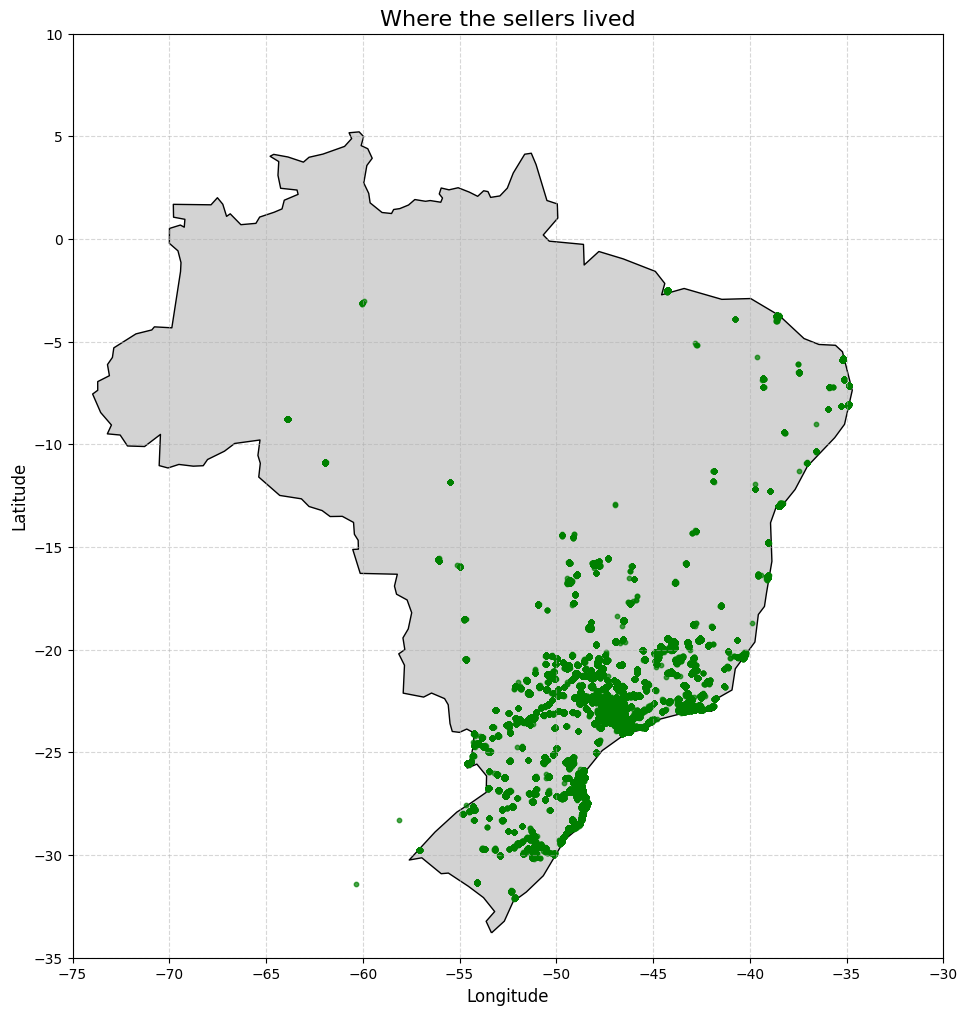

In [63]:
geometry = [Point(xy) for xy in zip(seller_geolocations['geolocation_lng'], seller_geolocations['geolocation_lat'])]
gdf = gpd.GeoDataFrame(seller_geolocations, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(figsize=(12, 12))
brazil.plot(ax=ax, color='lightgray', edgecolor='black')

gdf.plot(ax=ax, color='green', alpha=0.7, markersize=10)

plt.xlim([-75, -30])
plt.ylim([-35, 10])

plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Where the sellers lived', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.show()

**Insight:**
- Much sellers are located in the south of Brazil.

In [64]:
sum_customer_city = pd.DataFrame(data_all.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False).reset_index()).rename(columns={'customer_id': 'quantity'})
sum_seller_city = pd.DataFrame(data_all.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False).reset_index()).rename(columns={'seller_id': 'quantity'})

max_cust_city_qty = sum_customer_city['quantity'].max()
max_seller_city_qty = sum_seller_city['quantity'].max()

cust_city_colors = ['lightgray' if qty != max_cust_city_qty else 'orange' for qty in sum_customer_city['quantity']]
seller_city_colors = ['lightgray' if qty != max_seller_city_qty else 'green' for qty in sum_seller_city['quantity']]

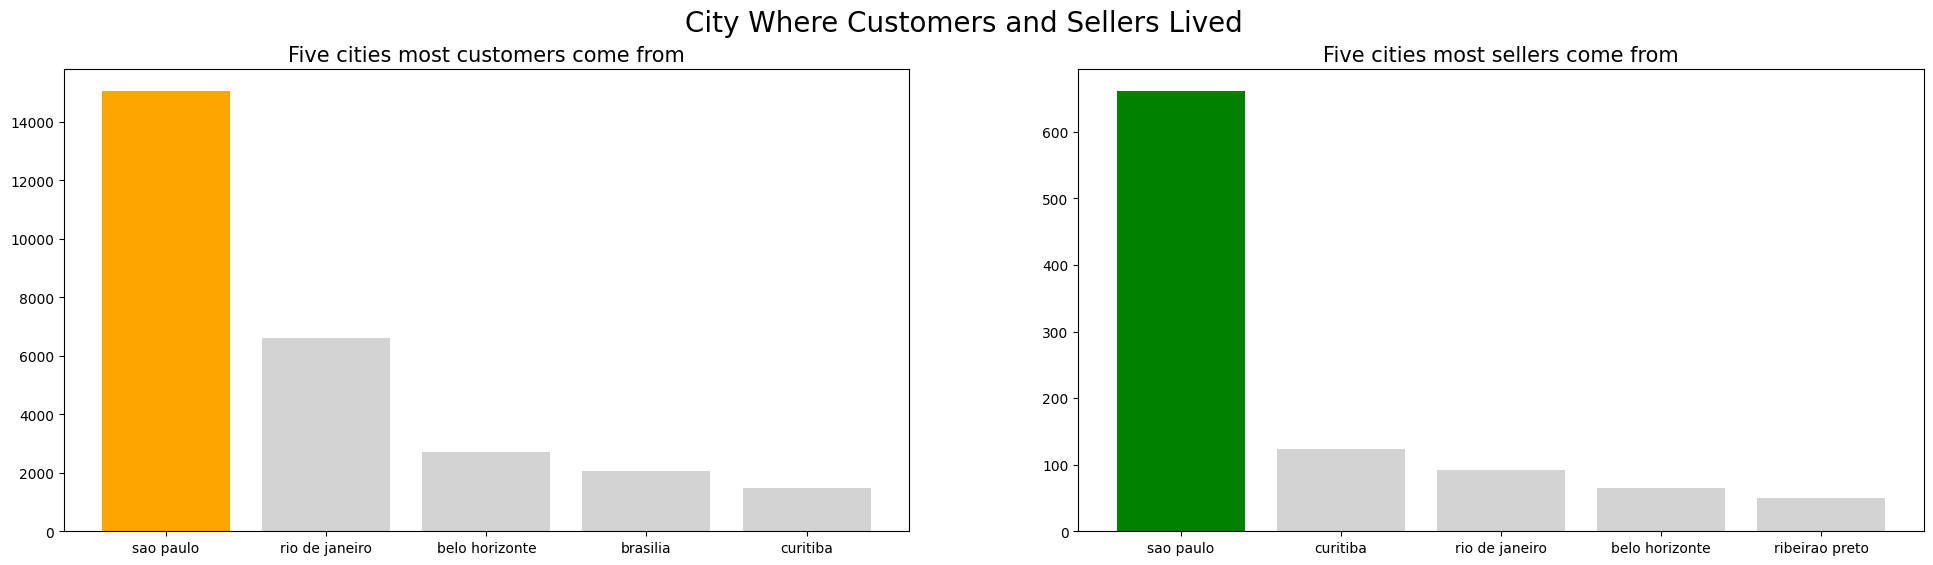

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

ax[0].bar(x=sum_customer_city['customer_city'].head(), height=sum_customer_city['quantity'].head(), color=cust_city_colors)
ax[0].set_title("Five cities most customers come from", fontsize=15),

ax[1].bar(x=sum_seller_city['seller_city'].head(), height=sum_seller_city['quantity'].head(), color=seller_city_colors)
ax[1].set_title("Five cities most sellers come from", fontsize=15),

plt.suptitle("City Where Customers and Sellers Lived", fontsize=20)

plt.show()

**Insight:**
- Sao paulo are dominating in terms of customers and sellers quantity.

## Conlcusion

- How has the company's sales and revenue performed in the last few years?<br>
The number of orders has steadily increased from September 2016 to October 2017. After this, there are some fluctuations, but the order count remains relatively stable, reaching a peak in October 2017 and then stabilizing at a slightly lower level through 2018. evenue also shows a similar growth pattern to the number of orders, increasing steadily until October 2017. After this peak, there are some dips and recoveries, with revenue staying relatively consistent after November 2017, hovering around the same high level into mid-2018.<br>

- Which products sell the most and the least?<br>
Based on the graph, the most selling product is bed bath table. On the other hand, the least selling product is cd/dvd musicals. The highest selling product sold for about 3000+ pcs, so it contributed to almost 30% of all orders.<br>
    

- Are customers satisfied with their orders?<br>
We safe to assumed that customers are satisfied with their orders. It is proven by the graph that shows almost 60% of customers give 5 stars. So, even if you combine 1-4 stars quantity, you can't beat the 5 stars quantity.<br>


- How's the spending distribution across customers?<br>
Most customers spend a relatively small amount (concentrated between 0 and 150R\\$). There are very few customers who spend beyond 300R\\$, with the frequency dropping sharply as spending increases.<br>
 
- Where are the majority of customers and sellers located?<br>
As you can see in the graph, customers and sellers mostly lived in south or east area of Brazil. This is actually normal because majority of Brazilian people are lived in these areas. Customers also commonly lived in capital town such as Sao Paulo and Rio de Janeiro.